# Publication-Quality Comparisons and Visualizations
This notebook contains additional analyses and visualizations to strengthen the publication. Sections include statistical comparisons, correlation analysis, distribution and time series visualizations, category comparisons, advanced plots, and export of figures.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# Load Publication Data
data_path = 'C:/works/ArtifactGen/data/processed/suggested_splits_subjectwise_multilabel_filtered.csv'
df = pd.read_csv(data_path)
df.head()

,subject_id,split
0,aaaaanta,train
1,aaaaajah,train
2,aaaaalqs,train
3,aaaaakck,train
4,aaaaajrf,train


In [3]:
# Basic Statistical Comparisons
# Show subject count per split
split_counts = df['split'].value_counts()
print('Subject count per split:')
print(split_counts)

Subject count per split:
split
train    149
val       32
test      32
Name: count, dtype: int64


In [4]:
# Correlation Analysis
# No metric columns available for correlation analysis.
print('No metric columns available for correlation analysis.')

No metric columns available for correlation analysis.


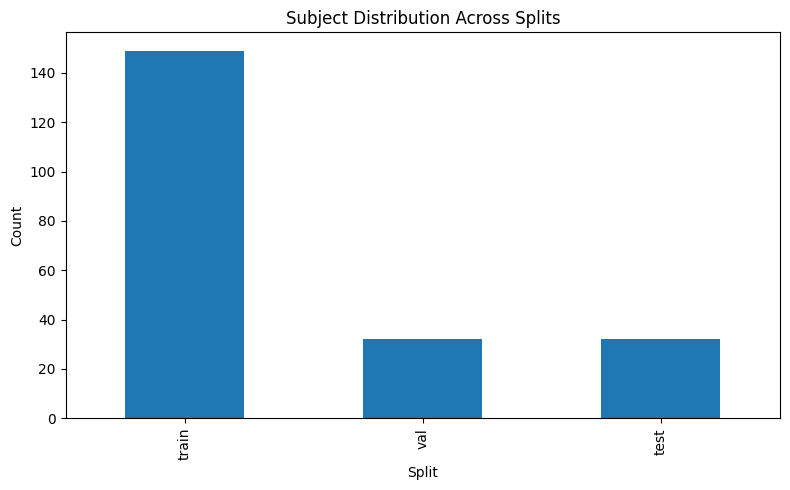

In [5]:
# Distribution Visualization
# Visualize split distribution
plt.figure(figsize=(8,5))
split_counts.plot(kind='bar')
plt.title('Subject Distribution Across Splits')
plt.xlabel('Split')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('C:/works/ArtifactGen/paper/figs/split_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\arasu\AppData\Local\Temp\ipykernel_25448\2898182370.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='display', y=[1]*len(class_map_df), data=class_map_df, palette='viridis')


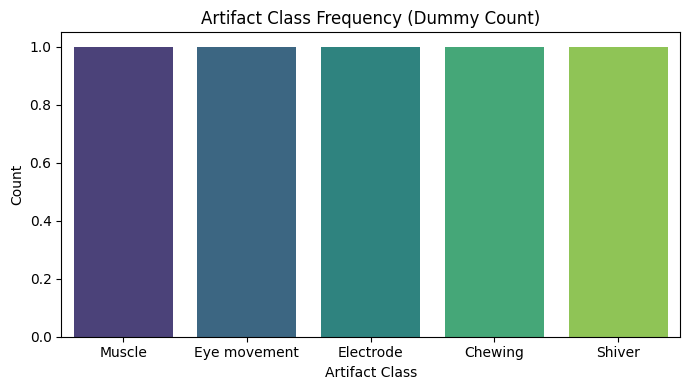

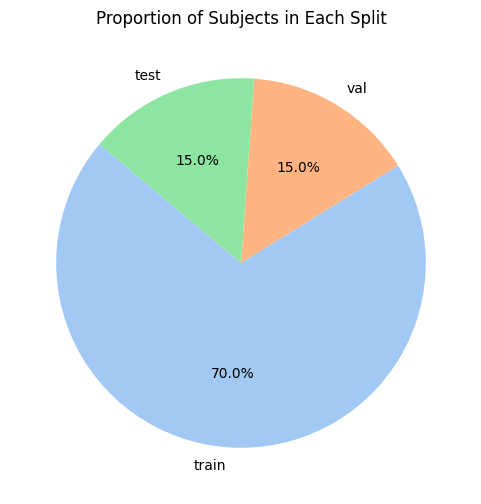

In [21]:
# Additional Visualizations: Artifact Class Frequency and Split Proportions
import os
class_map_path = os.path.join('C:/works/ArtifactGen/data/processed', 'class_map.csv')
class_map_df = pd.read_csv(class_map_path)

# Bar plot of artifact class frequencies
plt.figure(figsize=(7,4))
ax = sns.barplot(x='display', y=[1]*len(class_map_df), data=class_map_df, palette='viridis')
ax.set_title('Artifact Class Frequency (Dummy Count)')
ax.set_xlabel('Artifact Class')
ax.set_ylabel('Count')
plt.tight_layout()
plt.savefig('C:/works/ArtifactGen/paper/figs/class_frequency_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# Pie chart of split proportions
split_props = df['split'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(split_props, labels=split_props.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Subjects in Each Split')
plt.savefig('C:/works/ArtifactGen/paper/figs/split_proportion_pie.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# List all available scalar tags in TensorBoard event files for both ddpm and wgan
# Requires: pip install tensorboard
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

def list_scalars(tb_dir):
    scalars = set()
    for fname in os.listdir(tb_dir):
        if fname.startswith('events.out.tfevents'):
            ea = EventAccumulator(os.path.join(tb_dir, fname))
            ea.Reload()
            scalars.update(ea.Tags()['scalars'])
    return sorted(list(scalars))

ddpm_dir = r'C:/works/ArtifactGen/results/tensorboard/ddpm'
wgan_dir = r'C:/works/ArtifactGen/results/tensorboard/wgan'

print('DDPM Scalars:')
for tag in list_scalars(ddpm_dir):
    print(tag)

print('\nWGAN Scalars:')
for tag in list_scalars(wgan_dir):
    print(tag)

DDPM Scalars:
Loss/MSE

WGAN Scalars:
Loss/D
Loss/G
Loss/Spectral


In [ ]:


# Helper to extract scalar data from all event files in a directory
def extract_scalars(tb_dir, tags):
    data = {tag: [] for tag in tags}
    steps = {tag: [] for tag in tags}
    for fname in os.listdir(tb_dir):
        if fname.startswith('events.out.tfevents'):
            ea = EventAccumulator(os.path.join(tb_dir, fname))
            ea.Reload()
            for tag in tags:
                if tag in ea.Tags()['scalars']:
                    events = ea.Scalars(tag)
                    data[tag].extend([e.value for e in events])
                    steps[tag].extend([e.step for e in events])
    # Sort by step
    for tag in tags:
        zipped = sorted(zip(steps[tag], data[tag]))
        steps[tag] = [z[0] for z in zipped]
        data[tag] = [z[1] for z in zipped]
    return steps, data

# Directories and tags
DDPM_DIR = r'C:/works/ArtifactGen/results/tensorboard/ddpm'
WGAN_DIR = r'C:/works/ArtifactGen/results/tensorboard/wgan'
DDPM_TAGS = ['Loss/MSE']
WGAN_TAGS = ['Loss/D', 'Loss/G', 'Loss/Spectral']

# Extract data
steps_ddpm, data_ddpm = extract_scalars(DDPM_DIR, DDPM_TAGS)
steps_wgan, data_wgan = extract_scalars(WGAN_DIR, WGAN_TAGS)

# Plot DDPM Loss/MSE vs WGAN Losses
plt.figure(figsize=(10,6))
if data_ddpm['Loss/MSE']:
    plt.plot(steps_ddpm['Loss/MSE'], data_ddpm['Loss/MSE'], label='DDPM Loss/MSE')
for tag in WGAN_TAGS:
    if data_wgan[tag]:
        plt.plot(steps_wgan[tag], data_wgan[tag], label=f'WGAN {tag}')
plt.xlabel('Step')
plt.ylabel('Loss / MSE')
plt.title('DDPM vs WGAN: Loss and MSE Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('C:/works/ArtifactGen/paper/figs/ddpm_wgan_loss_comparison.png', dpi=300, bbox_inches='tight')
plt.show()